# Analysis

Monkeypox is an infectious disease caused by the monkeypox virus that can occur in certain animals, including humans. Symptoms begin with fever, headache, muscle pains, swollen lymph nodes, and feeling tired.

An ongoing outbreak of monkeypox was confirmed on 6 May 2022, beginning with a British resident who, after traveling to Nigeria (where the disease is endemic), presented symptoms consistent with monkeypox on 29 April 2022. The resident returned to the United Kingdom on 4 May, creating the country's index case of the outbreak.

In [365]:
# Increase width of Jupyter Notebook Interface
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [366]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# About the dataset

Monkey_Pox_Cases_Worldwide : This dataset contains a tally of confirmed and suspected cases in all the countries.

Worldwide_Case_Detection_Timeline : This dataset contains the timeline for confirmed cases w.r.t. date time, it also contains some other details on every case that is being reported.

Daily_Country_Wise_Confirmed_Cases : This dataset contains the daily number of confirmed cases for all the countries where the virus has entered.

In [367]:
# Read data files
case = pd.read_csv('Monkey_Pox_Cases_Worldwide.csv')
case_timeline = pd.read_csv('Worldwide_Case_Detection_Timeline.csv')
confirmed_case = pd.read_csv('Daily_Country_Wise_Confirmed_Cases.csv')

In [368]:
# Print shape of data files (row, column)
print('Cases Worldwide: ', case.shape)
print('Case Detection Timeline: ', case_timeline.shape)
print('Daily Confirmed Cases: ', confirmed_case.shape)

Cases Worldwide:  (125, 6)
Case Detection Timeline:  (58002, 9)
Daily Confirmed Cases:  (107, 129)


# Data exploration

In [369]:
case.head()

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
0,England,3320.0,0.0,5.0,2.0,7.0
1,Portugal,871.0,0.0,0.0,0.0,34.0
2,Spain,6884.0,0.0,13.0,2.0,0.0
3,United States,21761.0,0.0,4.0,41.0,11.0
4,Canada,1320.0,12.0,1.0,5.0,0.0


In [370]:
case_timeline.head()  # Lots of NaN

,Date_confirmation,Country,City,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
0,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-02-17,Cameroon,NaN,0-39,NaN,NaN,NaN,NaN,NaN
4,2022-02-17,Cameroon,NaN,0-39,NaN,NaN,NaN,NaN,NaN


In [371]:
confirmed_case.head()

,Country,2022-01-31,2022-02-17,2022-02-28,2022-03-04,2022-03-31,2022-04-10,2022-04-12,2022-04-30,2022-05-06,...,2022-08-31,2022-09-01,2022-09-02,2022-09-03,2022-09-04,2022-09-05,2022-09-06,2022-09-07,2022-09-08,2022-09-09
0,Nigeria,3,0,1,0,6,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
1,Cameroon,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Central African Republic,0,0,0,2,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Republic of Congo,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,England,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,63,0,0,0,0


In [372]:
print(f"Case Dataset Information:\n")
case.info()

Case Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             125 non-null    object 
 1   Confirmed_Cases     125 non-null    float64
 2   Suspected_Cases     125 non-null    float64
 3   Hospitalized        125 non-null    float64
 4   Travel_History_Yes  125 non-null    float64
 5   Travel_History_No   125 non-null    float64
dtypes: float64(5), object(1)
memory usage: 6.0+ KB


In [373]:
print(f"Summary of case dataset:")
case.describe().T  # transpose

Summary of case dataset:


,count,mean,std,min,25%,50%,75%,max
Confirmed_Cases,125.0,461.496,2153.757181,0.0,2.0,5.0,71.0,21761.0
Suspected_Cases,125.0,27.056,242.531884,0.0,0.0,0.0,0.0,2681.0
Hospitalized,125.0,1.184,2.826670,0.0,0.0,0.0,1.0,18.0
Travel_History_Yes,125.0,2.128,4.827635,0.0,0.0,1.0,3.0,41.0
Travel_History_No,125.0,0.720,3.566420,0.0,0.0,0.0,0.0,34.0


### Checking for nulls in dataset

In [374]:
case.isnull().sum().to_frame().T  # Convert Series to DataFrame

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
0,0,0,0,0,0,0


In [375]:
case_timeline.isnull().sum().to_frame().T  # Lots of nulls; need to clean later

,Date_confirmation,Country,City,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
0,0,0,56808,55225,55688,57816,57715,57605,57673


In [376]:
confirmed_case.isnull().sum().to_frame()

,0
Country,0
2022-01-31,0
2022-02-17,0
2022-02-28,0
2022-03-04,0
...,...
2022-09-05,0
2022-09-06,0
2022-09-07,0
2022-09-08,0


In [377]:
print(case["Country"].shape)
print(f'\n There are {len(case["Country"].unique())} countries with record of monkeypox cases. \n')
case["Country"].unique()

(125,)

 There are 125 countries with record of monkeypox cases. 



array(['England', 'Portugal', 'Spain', 'United States', 'Canada',
       'Sweden', 'Italy', 'France', 'Belgium', 'Australia', 'Germany',
       'Netherlands', 'Israel', 'Switzerland', 'Greece', 'Austria',
       'Argentina', 'Denmark', 'Morocco', 'Slovenia', 'Scotland',
       'Czech Republic', 'United Arab Emirates', 'Finland', 'Wales',
       'Northern Ireland', 'Sudan', 'Bolivia', 'Iran', 'Ecuador', 'Malta',
       'Ireland', 'Mexico', 'Pakistan', 'French Guiana', 'Thailand',
       'Peru', 'Brazil', 'Malaysia', 'Hungary', 'Norway', 'Paraguay',
       'Costa Rica', 'Gibraltar', 'Mauritius', 'Haiti', 'Uruguay',
       'Latvia', 'Cayman Islands', 'Kosovo', 'Turkey', 'Bahamas', 'Ghana',
       'India', 'Iceland', 'Poland', 'Bangladesh', 'Uganda', 'Cambodia',
       'Malawi', 'Venezuela', 'Romania', 'Georgia', 'Slovakia',
       'Luxembourg', 'Nepal', 'Chile', 'Serbia', 'Lebanon', 'South Korea',
       'Singapore', 'South Africa', 'Taiwan', 'Colombia', 'Croatia',
       'Bulgaria', 'Som

In [378]:
case_timeline.describe()

,Date_confirmation,Country,City,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
count,58002,58002,1194,2777,2314,186,287,397,329
unique,128,108,161,83,5,89,2,1,2
top,2022-08-22,United States,Toronto,20-69,male,genital ulcer lesions,N,Y,Y
freq,2063,22017,467,615,2272,30,161,397,241


# Preparing Data:

In [379]:
case.head(1)

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
0,England,3320.0,0.0,5.0,2.0,7.0


In [380]:
# Converting from Float to Int for quicker calculations
case[["Confirmed_Cases"]] = case[["Confirmed_Cases"]].astype("int")
case[["Suspected_Cases"]] = case[["Suspected_Cases"]].astype("int")
case[["Hospitalized"]] = case[["Hospitalized"]].astype("int")
case[["Travel_History_Yes"]] = case[["Travel_History_Yes"]].astype("int")
case[["Travel_History_No"]] = case[["Travel_History_No"]].astype("int")

case.dtypes

Country               object
Confirmed_Cases        int32
Suspected_Cases        int32
Hospitalized           int32
Travel_History_Yes     int32
Travel_History_No      int32
dtype: object

In [381]:
case["Total_Cases"] = case[["Confirmed_Cases", "Suspected_Cases"]].sum(axis=1)  # Create Total_Cases column; axis=1 means function is applied row-wise on the df
case.head()

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No,Total_Cases
0,England,3320,0,5,2,7,3320
1,Portugal,871,0,0,0,34,871
2,Spain,6884,0,13,2,0,6884
3,United States,21761,0,4,41,11,21761
4,Canada,1320,12,1,5,0,1332


In [382]:
# Cleaning timeline data set --- putting this on hold for now
# case_timeline.head(1)

In [383]:
# case_timeline.describe()

In [384]:
# case_country = case_timeline[["Country", "City"]]  # create new df with only 'Country' and 'City columns'
# case_country_a = case_country.dropna()  # create new df that has dropped na values
# case_country_a.value_counts()

In [385]:
# case_country_b = case_country_a.value_counts(['Country']).reset_index(name='Total')
# case_country_b.head()

In [386]:
# Top 10 countries with most cases
# case_country_b[:10]

# Visualization portion

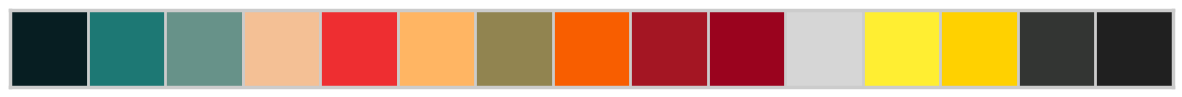

In [387]:
# Custom Palete for Visualization
sns.set_style("whitegrid")
sns.set_context("poster", font_scale = .7)

palette = ["#071e22","#1d7874","#679289","#f4c095","#ee2e31",
           "#ffb563","#918450","#f85e00","#a41623","#9a031e",
           "#d6d6d6","#ffee32","#ffd100","#333533","#202020"]

sns.palplot(sns.color_palette(palette))
plt.show()

In [388]:
# _,axs = plt.subplots(1,1, figsize=(18,6))
# plt.tight_layout(pad=4.0)

# p = sns.barplot(x=case_country_b["Country"][:10], y=case_country_b["Total"], palette=palette, saturation=1)
# p.set_label("Total Monkeypox Cases")
# p.set_xticklabels(p.get_xticklabels(), rotation= 90)

# for container in p.containers:
#         p.bar_label(container, label_type="edge", padding=2, size=15, color="black", rotation=45)

# plt.suptitle("Top 10 Countries with Monkeypox Cases", fontsize=20)   
# sns.despine(left=True, bottom=True)  # remove spines from plot
# plt.show()

# Case dataset visualization

### Confirmed and Suspected Cases by Country

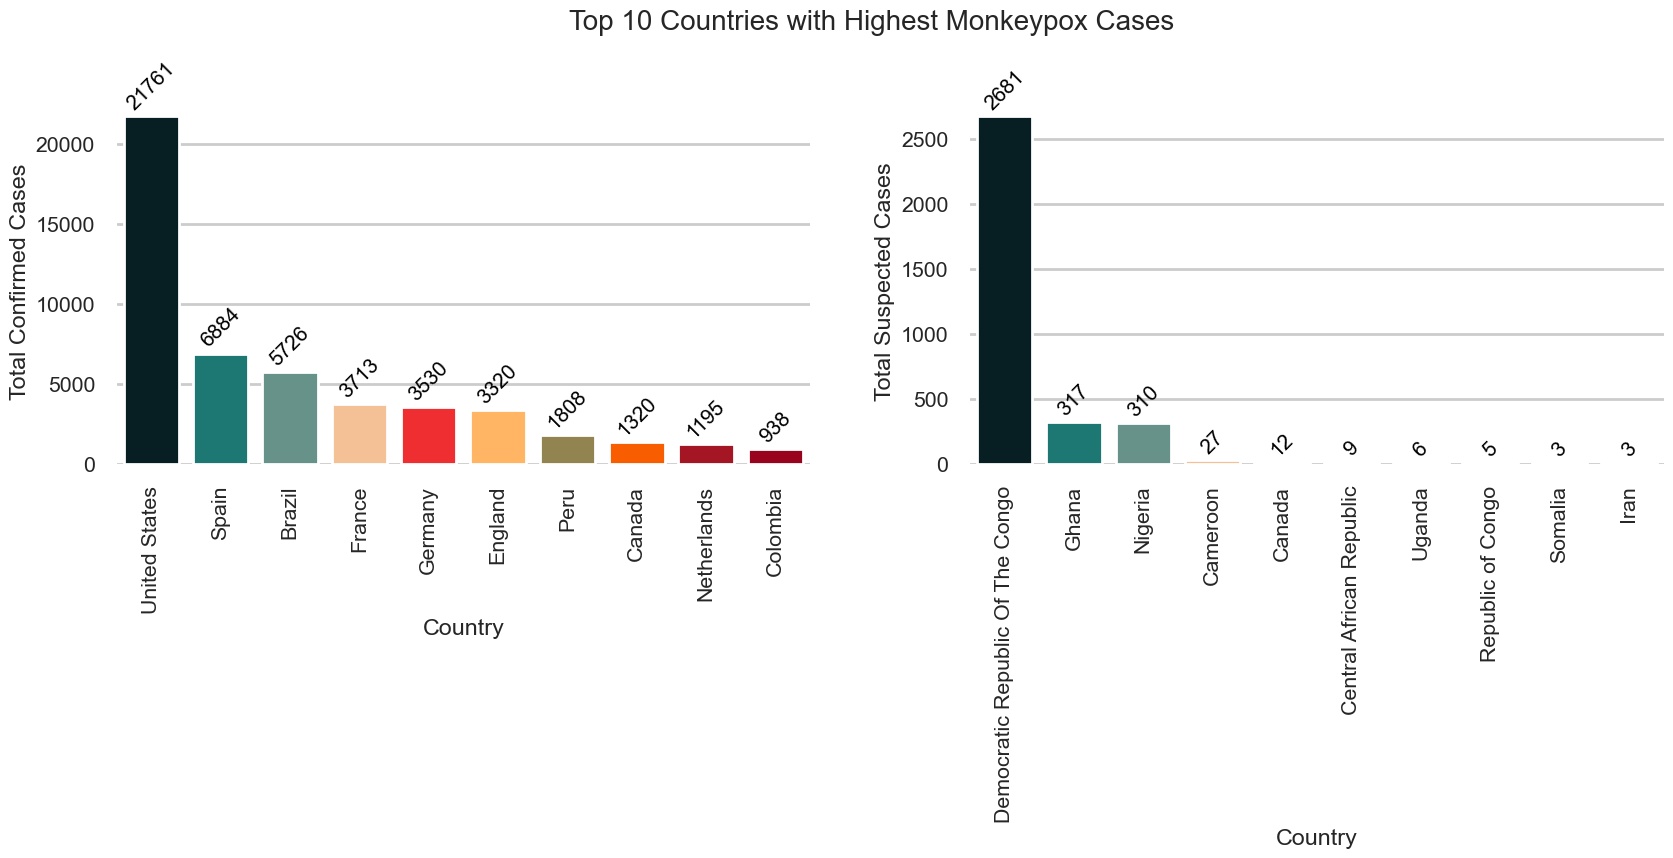

In [389]:
case_confirmed = case.sort_values(["Confirmed_Cases"], ascending = False)
case_suspected = case.sort_values(["Suspected_Cases"], ascending = False)

_,axs = plt.subplots(1,2, figsize=(18,6))
plt.tight_layout(pad=4.0)

sns.barplot(x=case_confirmed["Country"][:10], y=case_confirmed["Confirmed_Cases"], ax=axs[0], palette=palette, saturation=1)
axs[0].set_ylabel("Total Confirmed Cases")
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
for container in axs[0].containers:
    axs[0].bar_label(container, label_type="edge", padding=2, size=15, color="black", rotation=45)
    
sns.barplot(x=case_suspected["Country"][:10], y=case_suspected["Suspected_Cases"], ax=axs[1], palette=palette, saturation=1)
axs[1].set_ylabel("Total Suspected Cases")
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
for container in axs[1].containers:
    axs[1].bar_label(container, label_type="edge", padding=2, size=15, color="black", rotation=45)
    
plt.suptitle("Top 10 Countries with Highest Monkeypox Cases", fontsize=20)
sns.despine(left=True, bottom=True)
plt.show()

Initial observations:
- United States has the highest confirmed cases. 
    - 3x higher than Spain who is second highest in confirmed cases
    - Though, I'd like to compare against total population to determine the rate of confirmed cases
- Democratic Republic of the Congo has the highest suspected cases
- Top 3 countries of suspected cases are in Africa

### Total Cases by Country (Confirmed + Suspected)

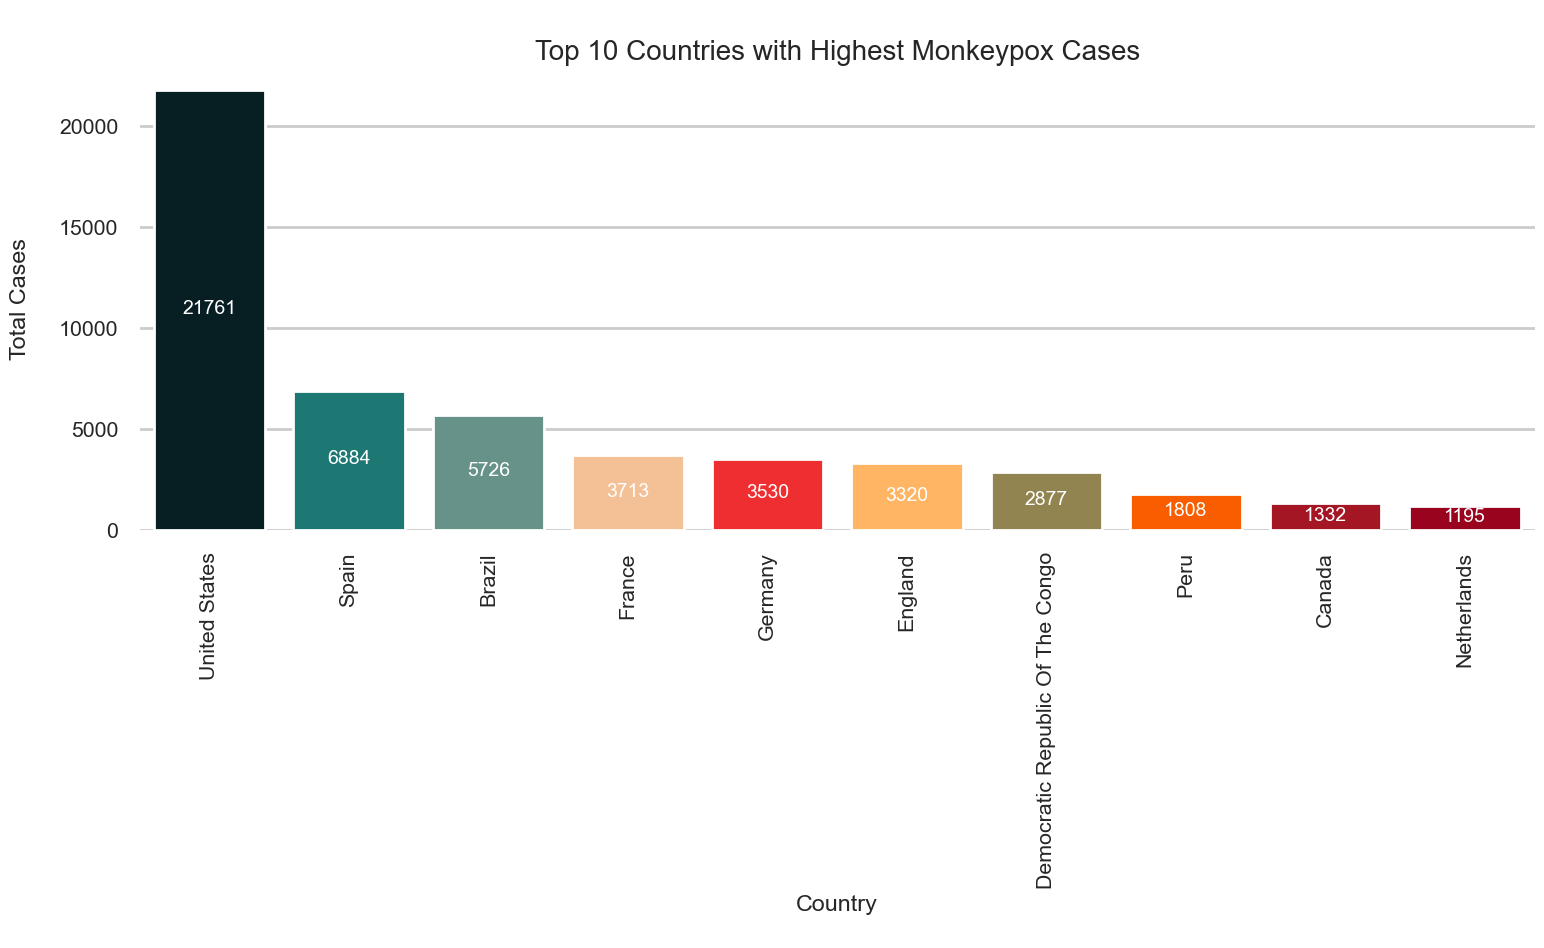

In [390]:
case_total = case.sort_values(["Total_Cases"], ascending = False)
plt.subplots(figsize=(18,6))
p = sns.barplot(x=case_total["Country"][:10], y=case_total["Total_Cases"], palette=palette, saturation=1)
p.axes.set_title("\nTop 10 Countries with Highest Monkeypox Cases", fontsize=20)
plt.ylabel("Total Cases\n")
plt.xlabel("Country\n")
plt.xticks(rotation=90)
for container in p.containers:
    p.bar_label(container, label_type="center", padding=1, size=14, color="white", rotation=0)

sns.despine(left=True, bottom=True)
plt.show()

### Hospitalied Patients

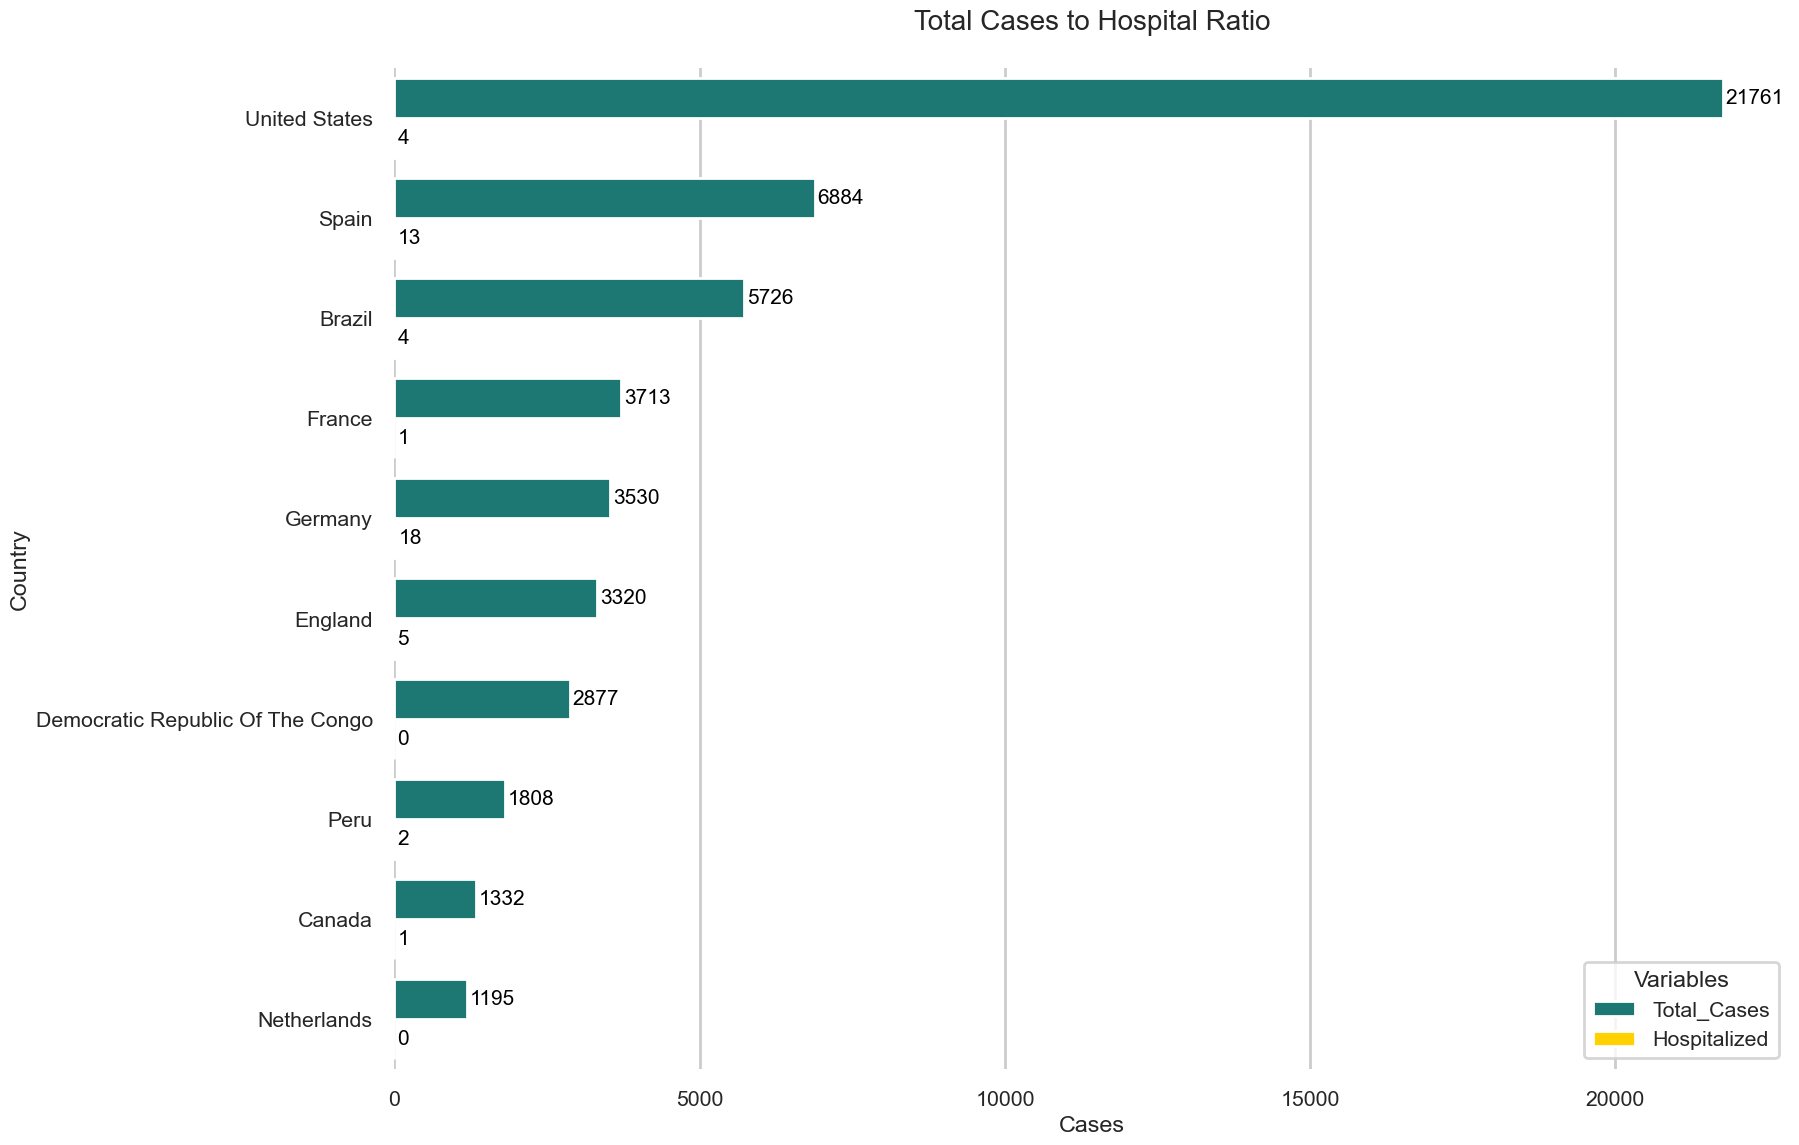

In [476]:
case_total_ratio = case_total.sort_values(["Total_Cases"], ascending=False)[:10]

case_total_ratio_melt = case_total_ratio.melt(id_vars=["Country"], value_vars=["Total_Cases", "Hospitalized"],
var_name="Variables", value_name="Values")

plt.subplots(figsize=(18,13))
p = sns.barplot(y=case_total_ratio_melt["Country"], x=case_total_ratio_melt["Values"], 
                hue=case_total_ratio_melt["Variables"], palette=["#1d7874","#ffd100"], saturation=1)
p.axes.set_title("Total Cases to Hospital Ratio\n", fontsize=20)
plt.ylabel("Country")
plt.xlabel("Cases")
plt.xticks(rotation=0)
for container in p.containers:
    p.bar_label(container, label_type="edge", padding=2, size=15, color="black", rotation=0)
    
sns.despine(left=True, bottom=True)
plt.show()

In [448]:
case_total_ratio_melt

,Country,Variables,Values
0,United States,Total_Cases,21761
1,Spain,Total_Cases,6884
2,Brazil,Total_Cases,5726
3,France,Total_Cases,3713
4,Germany,Total_Cases,3530
5,England,Total_Cases,3320
6,Democratic Republic Of The Congo,Total_Cases,2877
7,Peru,Total_Cases,1808
8,Canada,Total_Cases,1332
9,Netherlands,Total_Cases,1195


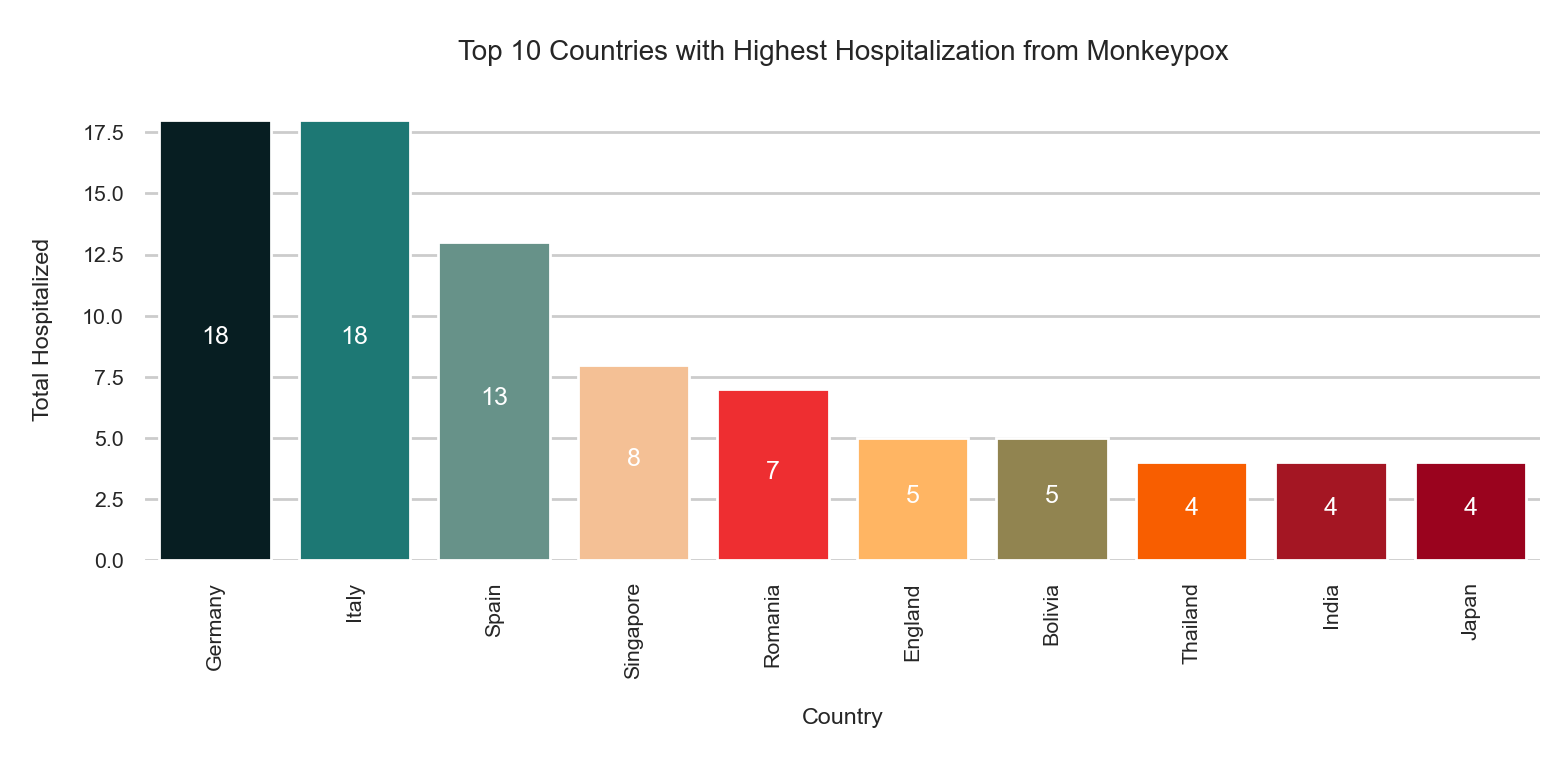

In [392]:
case_total_hospital = case.sort_values(["Hospitalized"] , ascending=False)

plt.subplots(figsize=(18,6))
p = sns.barplot(x=case_total_hospital["Country"][:10], y=case_total_hospital["Hospitalized"], palette=palette, saturation=1)

p.axes.set_title("\nTop 10 Countries with Highest Hospitalization from Monkeypox\n", fontsize=20)
plt.ylabel("\nTotal Hospitalized\n")
plt.xlabel("\nCountry\n")
plt.xticks(rotation=90)
for container in p.containers:
    p.bar_label(container, label_type="center", padding=2, size=18, color="white", rotation=0)

sns.despine(left=True, bottom=True)
plt.show()

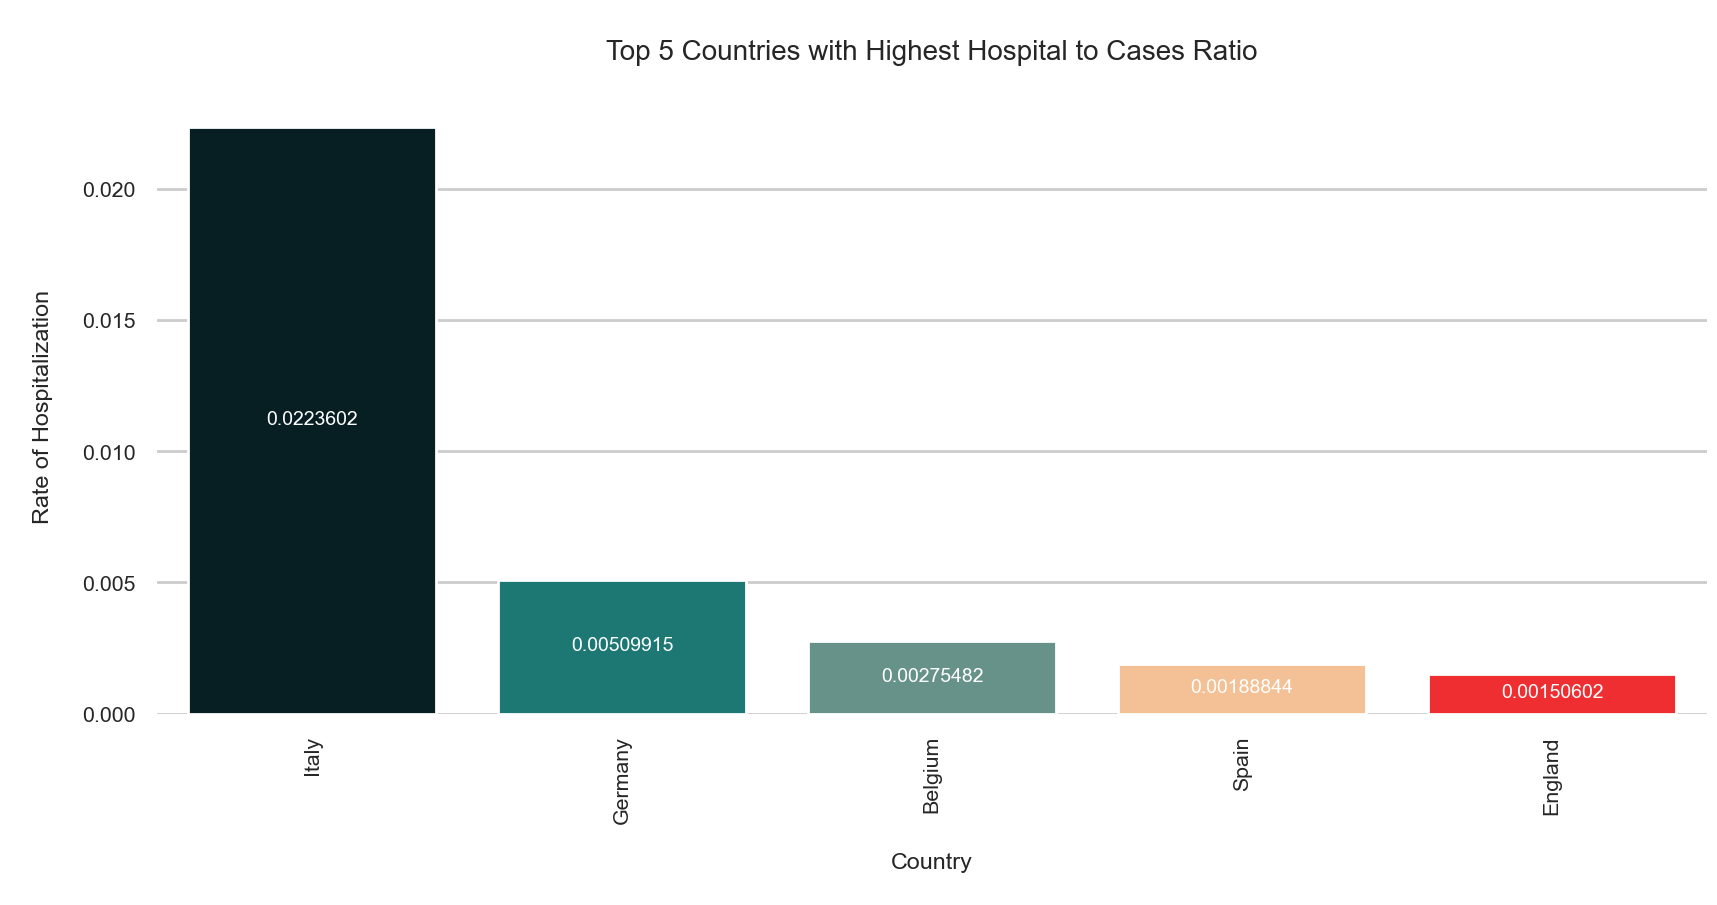

In [393]:
case_total_ratio["Hospital_to_Cases_Ratio"] = case_total_ratio["Hospitalized"] / case_total_ratio["Total_Cases"]  # add ratio column
case_total_ratio_ordered = case_total_ratio.sort_values(["Hospital_to_Cases_Ratio"], ascending=False)

plt.subplots(figsize=(20,8))
p = sns.barplot(x=case_total_ratio_ordered["Country"][:5], y=case_total_ratio_ordered["Hospital_to_Cases_Ratio"], palette=palette, saturation=1)

p.axes.set_title("\nTop 5 Countries with Highest Hospital to Cases Ratio\n", fontsize=20)
plt.ylabel("\nRate of Hospitalization\n")
plt.xlabel("\nCountry\n")
plt.xticks(rotation=90)
for container in p.containers:
    p.bar_label(container, label_type="center", padding=1, size=14, color="white", rotation=0)

sns.despine(left=True, bottom=True)
plt.show()

Italy is leading the pack, with about 2% of Monkeypox cases has led to hospitalization.

Germany is second just at 0.5% of Monkeypox cases leading to hospitalization.

In [394]:
symptom_type = case_timeline[["Symptoms"]]
symptom_type["Symptoms"].replace(np.nan, "NA", inplace=True)
symptom_type = symptom_type[symptom_type["Symptoms"].isin(["NA"]) == False]
symptom_type["Symptoms"] = symptom_type["Symptoms"].str.split(", | , | , |;")  # When multiple symptoms are recorded in one row, split it out into its own row
symptom_type = symptom_type.explode("Symptoms")

C:\Users\jisbe\AppData\Local\Temp\ipykernel_104644\3237268177.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [395]:
symptom_type.value_counts(["Symptoms"], ascending=False)

Symptoms                            
fever                                   59
genital ulcer lesions                   30
ulcerative lesions                      21
Rash                                    17
skin lesions                            17
                                        ..
enlarged lymph nodes                     1
difficulty swallowing                    1
chilling                                 1
characteristic symptoms of Monkeypox     1
isolated skin lesions                    1
Length: 98, dtype: int64

### Regex to search for similar symptoms, and replace to a consistent format

Fever symptom:

In [396]:
symptom_type.loc[symptom_type["Symptoms"] == "fever"].value_counts(["Symptoms"], ascending=False)

Symptoms
fever       59
dtype: int64

In [397]:
symptom_type[symptom_type["Symptoms"].str.match('.*ever.*') == True].value_counts(["Symptoms"], ascending=False)


Symptoms          
fever                 59
Fever                  3
mild fever             2
high fever             1
severe sore throat     1
dtype: int64

In [398]:
symptom_type.replace(to_replace=["fever", "Fever", "mild fever", "high fever"], value="Fever", inplace=True)

Ulcer:

Replaced 'genital ulcers' to existing symptom description'oral and genital ulcers'

In [399]:
symptom_type[symptom_type["Symptoms"].str.match('.*ulcer.*') == True].value_counts(["Symptoms"], ascending=False)

Symptoms               
genital ulcer lesions      30
ulcerative lesions         21
oral and genital ulcers    17
genital ulcers              5
dtype: int64

In [400]:
symptom_type[symptom_type["Symptoms"].str.match('.*Ulcer.*') == True].value_counts(["Symptoms"], ascending=False)

Series([], dtype: int64)

In [401]:
symptom_type.replace(to_replace=["genital ulcers"], value="oral and genital ulcers", inplace=True)

In [402]:
symptom_type.replace(to_replace=["oral and genital ulcers"], value="Oral and Genital Ulcers", inplace=True)

Ulcer Lesions


In [403]:
symptom_type[symptom_type["Symptoms"].str.match('.*ulcer*.') == True].value_counts(["Symptoms"], ascending=False)

Symptoms             
genital ulcer lesions    30
ulcerative lesions       21
dtype: int64

In [404]:
symptom_type[symptom_type["Symptoms"].str.match('.*Ulcer*.') == True].value_counts(["Symptoms"], ascending=False)

Symptoms               
Oral and Genital Ulcers    22
dtype: int64

In [405]:
symptom_type.replace(to_replace=["genital ulcer lesions"], value="Genital Ulcer Lesions", inplace=True)
symptom_type.replace(to_replace=["ulcerative lesions"], value="Ulcerative Lesions", inplace=True)

Lesions:

In [406]:
symptom_type[symptom_type["Symptoms"].str.match('.*lesion*.') == True].value_counts(["Symptoms"], ascending=False)

Symptoms                          
skin lesions                          17
lesions                                4
Skin lesions                           2
vesicular lesions                      2
Three lesions typical of monkeypox     1
Vesicular skin lesions                 1
isolated skin lesions                  1
lower abdomen skin lesions             1
papular and vesicular lesions          1
pustule-like lesions                   1
sore throat and later lesions          1
vesicle-like lesions                   1
vesicuated lesions                     1
vesicular lesions on face              1
dtype: int64

In [407]:
symptom_type[symptom_type["Symptoms"].str.match('.*Lesion*.') == True].value_counts(["Symptoms"], ascending=False)

Symptoms             
Genital Ulcer Lesions    30
Ulcerative Lesions       21
Lesions                   1
dtype: int64

In [408]:
symptom_type.replace(to_replace=["skin lesions", "lesions", "Skin lesions", "vesicular lesions", "Three lesions typical of monkeypox",
"Vesicular skin lesions", "isolated skin lesions", "lower abdomen skin lesions", "papular and vesicular lesions", "pustule-like lesions",
"sore throat and later lesions", "vesicle-like lesions", "vesicuated lesions", "vesicular lesions on face", "Lesions",
"skin manifestations"], value="Skin Lesions", inplace=True)

Rash:

In [409]:
symptom_type[symptom_type["Symptoms"].str.match('.*rash.*') == True].value_counts(["Symptoms"], ascending=False)

Symptoms                   
rash                           11
vesicular rash                  6
skin rashes                     3
Perianal rash                   2
rash on the skin                2
skin rash                       2
 rash                           1
Genital rashes                  1
genital rash                    1
rash and blisters               1
rashes                          1
rashes in the groin area        1
rashes typical of Monkeypox     1
vasicular rashes                1
dtype: int64

In [410]:
symptom_type[symptom_type["Symptoms"].str.match('.*Rash.*') == True].value_counts(["Symptoms"], ascending=False)

Symptoms                     
Rash                             17
Rash                              1
Rashes in the perianal region     1
dtype: int64

In [411]:
symptom_type.replace(to_replace=["rash", "vesicular rash", "skin rashes", "Perianal rash", "rash on the skin",
"skin rash", " rash", "Genital rashes", "genital rash", "rash and blisters", "rashes", "rashes in the groin area",
"rashes typical of Monkeypox", "vasicular rashes" ], value="Rash", inplace=True)

In [412]:
symptom_type.replace(to_replace=["Rashes in the perianal region" ], value="Rash", inplace=True)
symptom_type.replace(to_replace=["Rash " ], value="Rash", inplace=True)

Myalgia (Muscle Pain)

In [413]:
symptom_type[symptom_type["Symptoms"].str.match('.*muscle*.') == True].value_counts(["Symptoms"], ascending=False)

Symptoms   
muscle pain    4
muscle ache    1
dtype: int64

In [414]:
symptom_type[symptom_type["Symptoms"].str.match('.*Muscle*.') == True].value_counts(["Symptoms"], ascending=False)

Series([], dtype: int64)

In [415]:
symptom_type.replace(to_replace=["muscle pain", "back pain", "body pains", "muscle ache"], value="Muscle Pain", inplace=True)

In [416]:
symptom_type[symptom_type["Symptoms"].str.match('.*myalgia*.') == True].value_counts(["Symptoms"], ascending = False)

Symptoms
myalgias    3
myalgia     2
 myalgia    1
dtype: int64

In [417]:
symptom_type[symptom_type["Symptoms"].str.match('.*Myalgia*.') == True].value_counts(["Symptoms"], ascending = False)

Series([], dtype: int64)

In [418]:
symptom_type.replace(to_replace=["myalgias", "myalgia", " myalgia"], value="Myalgia", inplace=True)

In [419]:
symptom_type.replace(to_replace=["Muscle Pain"], value="Myalgia", inplace=True)

Headache:

In [420]:
symptom_type[symptom_type["Symptoms"].str.match('.*head*.') == True].value_counts(["Symptoms"], ascending=False)

Symptoms 
headache     14
headaches     1
dtype: int64

In [421]:
symptom_type[symptom_type["Symptoms"].str.match('.*Head*.') == True].value_counts(["Symptoms"], ascending=False)

Symptoms
Headache    1
dtype: int64

In [422]:
symptom_type.replace(to_replace=["headache", "headaches"], value="Headache", inplace=True)

Fatigue:

In [423]:
symptom_type[symptom_type["Symptoms"].str.match('.*fatigue*.') == True].value_counts(["Symptoms"], ascending=False)

Symptoms
fatigue     9
dtype: int64

In [424]:
symptom_type[symptom_type["Symptoms"].str.match('.*Fatigue*.') == True].value_counts(["Symptoms"], ascending=False)

Symptoms
Fatigue     3
dtype: int64

In [425]:
symptom_type.replace(to_replace=["fatigue"], value="Fatigue", inplace=True)

Sore Throat:

In [426]:
symptom_type[symptom_type["Symptoms"].str.match('.*throat*.') == True].value_counts("Symptoms", ascending=False)

Symptoms
sore throat           4
severe sore throat    1
dtype: int64

In [427]:
symptom_type[symptom_type["Symptoms"].str.match('.*Throat*.') == True].value_counts("Symptoms", ascending=False)

Series([], dtype: int64)

In [428]:
symptom_type.replace(to_replace=["sore throat", "severe sore throat"], value="Sore Throat", inplace=True)

Blisters/Vesicles:

In [429]:
symptom_type[symptom_type["Symptoms"].str.match('.*blister*.') == True].value_counts(["Symptoms"], ascending=False)

Symptoms                      
blisters                          4
blisters on hands                 1
blisters on limbs and genitals    1
genital blisters                  1
dtype: int64

In [430]:
symptom_type[symptom_type["Symptoms"].str.match('.*Blister*.') == True].value_counts(["Symptoms"], ascending=False)

Series([], dtype: int64)

In [431]:
symptom_type[symptom_type["Symptoms"].str.match('.*vesicle*.') == True].value_counts(["Symptoms"], ascending=False)

Symptoms
vesicles    1
dtype: int64

In [432]:
symptom_type[symptom_type["Symptoms"].str.match('.*Vesicle*.') == True].value_counts(["Symptoms"], ascending=False)

Symptoms
Vesicles    1
dtype: int64

In [433]:
symptom_type.replace(to_replace=["blisters", "blisters on hands", "blisters on limbs and genitals",
"genital blisters", "vesicles", "Vesicles"], value="Blisters", inplace=True)

In [434]:
# pd.set_option('display.max_rows', None)
# pd.reset_option('all')
symptom_type.value_counts(["Symptoms"], ascending=False)

Symptoms                                                  
Fever                                                         65
Rash                                                          53
Skin Lesions                                                  40
Genital Ulcer Lesions                                         30
Oral and Genital Ulcers                                       22
Ulcerative Lesions                                            21
Headache                                                      16
Myalgia                                                       14
Fatigue                                                       12
Blisters                                                       9
Sore Throat                                                    5
malaise                                                        3
chills                                                         3
general malaise                                                2
encephalitis                   

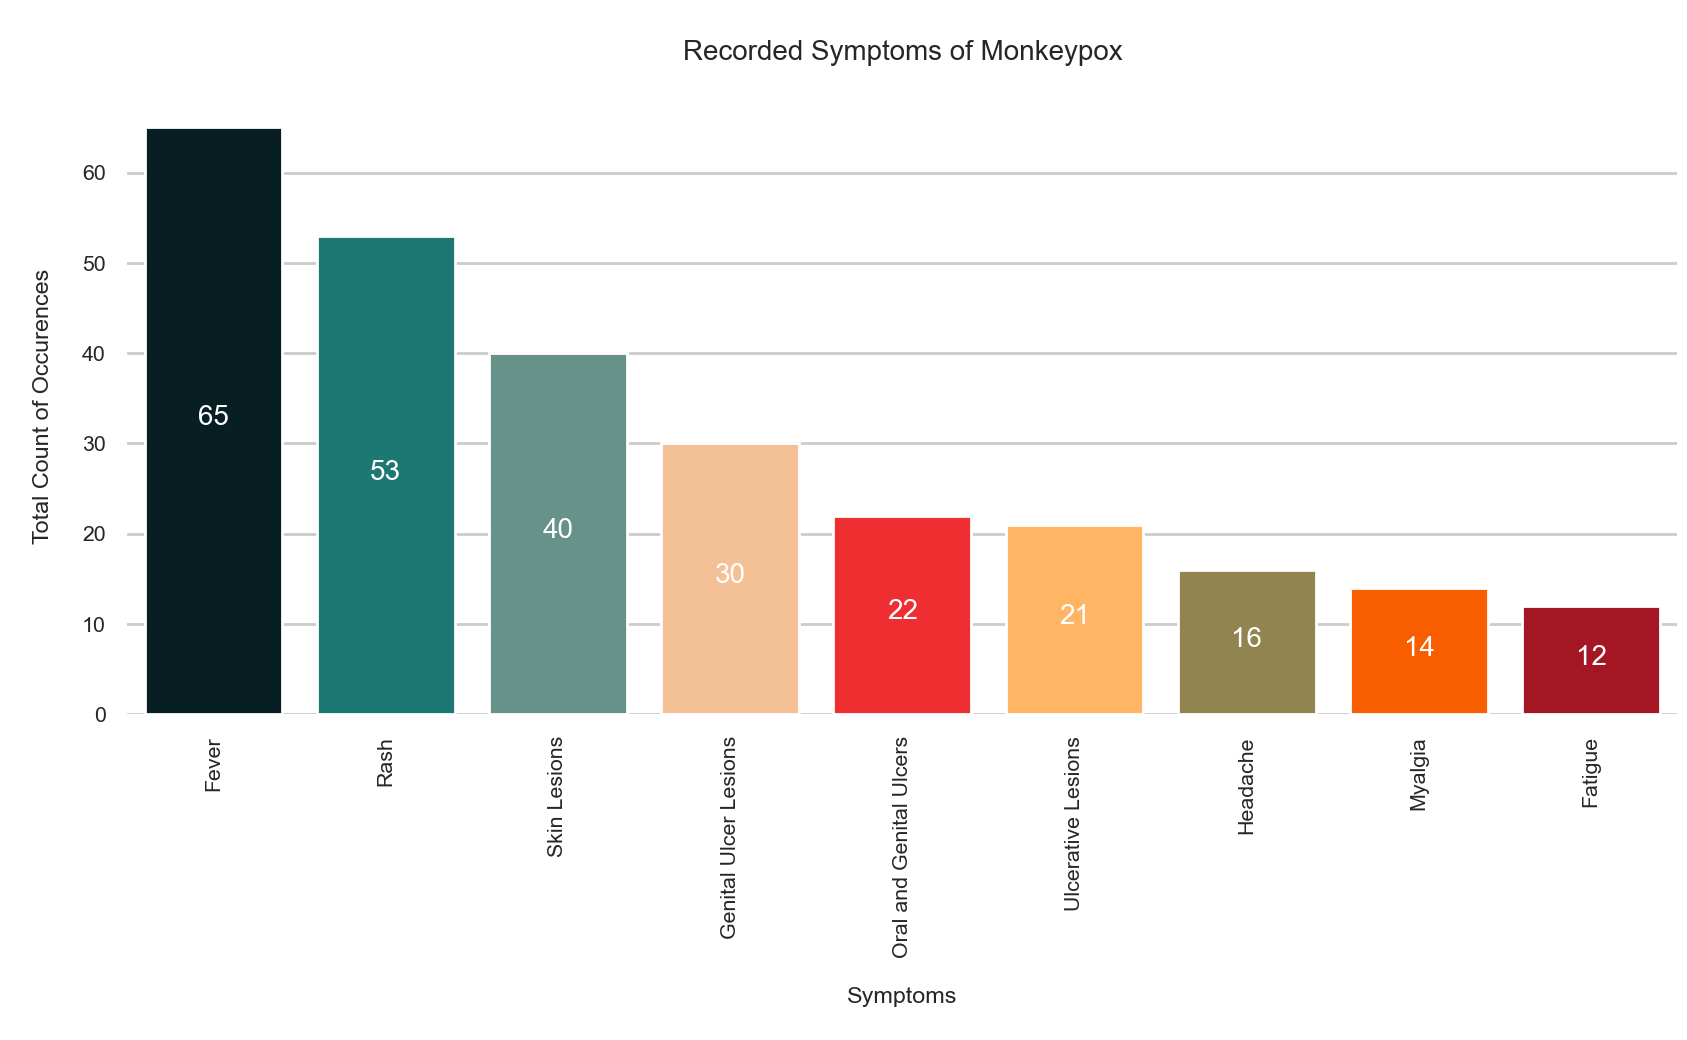

In [435]:
plt.subplots(figsize=(20,8))
p = sns.countplot(x=symptom_type["Symptoms"], order=symptom_type["Symptoms"].value_counts().index[:9], palette=palette, saturation=1)

p.axes.set_title("\nRecorded Symptoms of Monkeypox\n", fontsize=20)
plt.ylabel("\nTotal Count of Occurences\n")
plt.xlabel("\nSymptoms\n")
plt.xticks(rotation=90)

for container in p.containers:
    p.bar_label(container, label_type="center", padding=2, size=20, color="white", rotation=0)

sns.despine(left=True, bottom=True)
plt.show()

### Travel History

In [436]:
case.describe()

,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No,Total_Cases
count,125.000000,125.000000,125.00000,125.000000,125.00000,125.000000
mean,461.496000,27.056000,1.18400,2.128000,0.72000,488.552000
std,2153.757181,242.531884,2.82667,4.827635,3.56642,2163.918416
min,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000
25%,2.000000,0.000000,0.00000,0.000000,0.00000,2.000000
50%,5.000000,0.000000,0.00000,1.000000,0.00000,6.000000
75%,71.000000,0.000000,1.00000,3.000000,0.00000,71.000000
max,21761.000000,2681.000000,18.00000,41.000000,34.00000,21761.000000


In [554]:
case["Travel_History"] = case[["Travel_History_Yes", "Travel_History_No"]].sum(axis=1)
case_travel_history = case.sort_values(["Travel_History"], ascending=False)[:5]
case_travel_history

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No,Total_Cases,Travel_History
3,United States,21761,0,4,41,11,21761,52
10,Germany,3530,0,18,19,16,3530,35
1,Portugal,871,0,0,0,34,871,34
37,Brazil,5726,0,4,20,4,5726,24
6,Italy,805,0,18,19,4,805,23


In [555]:
case_travel_history_melt = case_travel_history.melt(id_vars=["Country"], value_vars=["Travel_History_Yes", "Travel_History_No"],
    var_name="Variables", value_name="Values")

In [556]:
case_travel_history_melt.sort_values(["Variables", "Values"], ascending=False)

,Country,Variables,Values
0,United States,Travel_History_Yes,41
3,Brazil,Travel_History_Yes,20
1,Germany,Travel_History_Yes,19
4,Italy,Travel_History_Yes,19
2,Portugal,Travel_History_Yes,0
7,Portugal,Travel_History_No,34
6,Germany,Travel_History_No,16
5,United States,Travel_History_No,11
8,Brazil,Travel_History_No,4
9,Italy,Travel_History_No,4


In [571]:
case_travel_history_melt.replace(to_replace=["Travel_History_Yes", "Travel_History_No"], value="Combined_Travel_History", inplace=True)

In [586]:
case_travel_history_melt_total = case_travel_history_melt.groupby("Country")["Values"].sum().reset_index()

In [593]:
case_travel_history_melt_total = case_travel_history_melt_total.sort_values(["Values"], ascending=False)

In [594]:
case_travel_history_melt_total

,Country,Values
4,United States,52
1,Germany,35
3,Portugal,34
0,Brazil,24
2,Italy,23


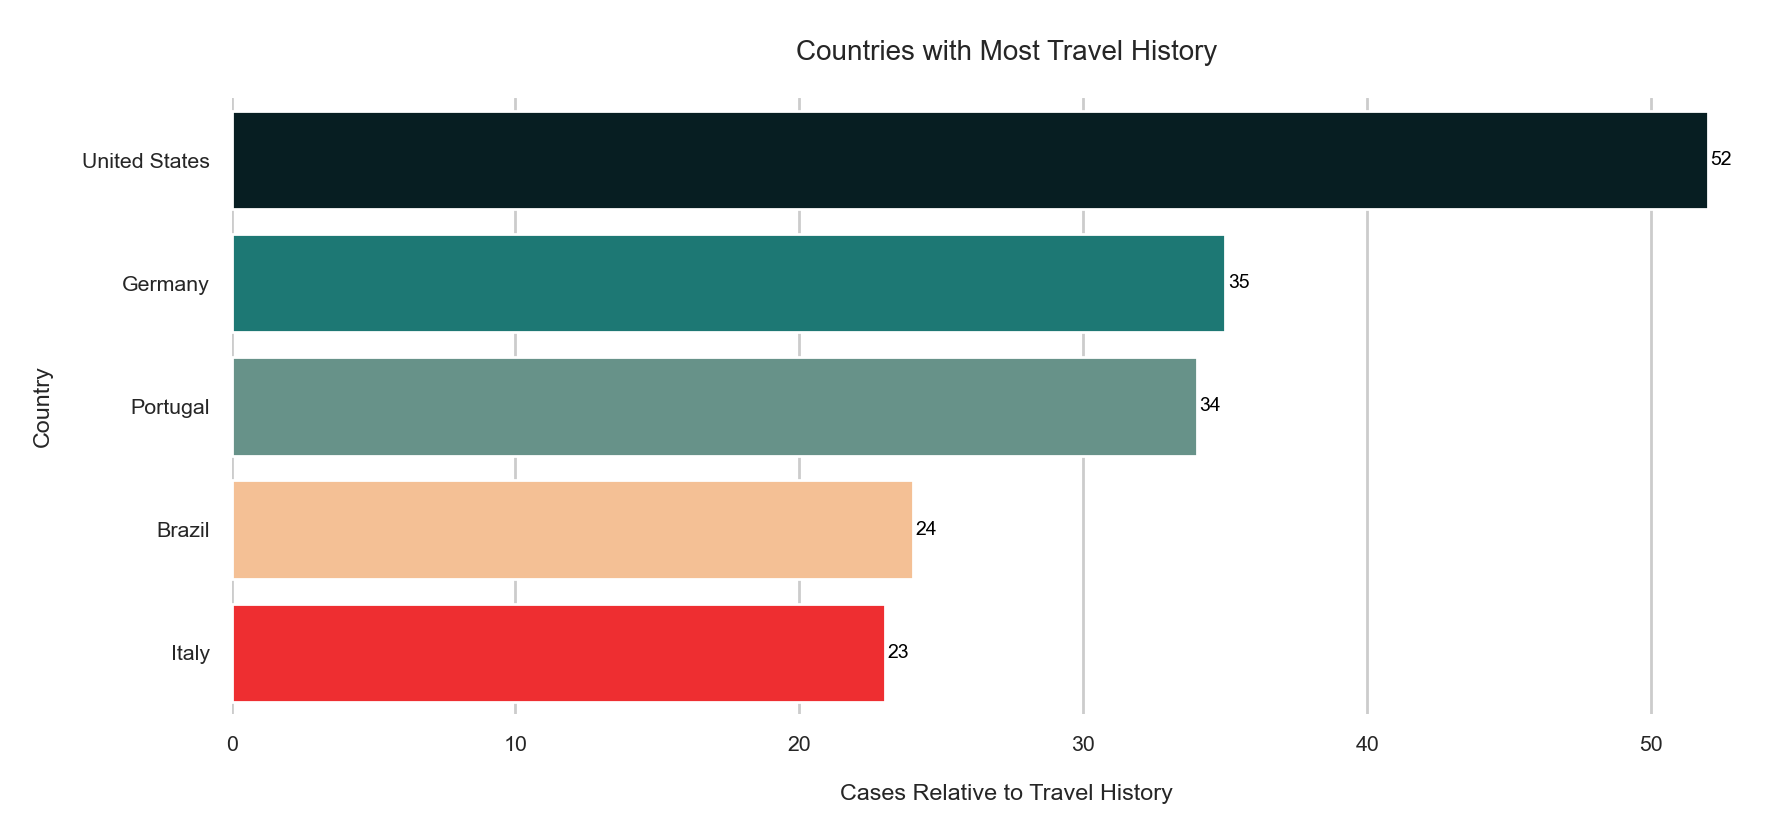

In [595]:
plt.subplots(figsize=(20, 8))
p = sns.barplot(y=case_travel_history_melt_total["Country"], x=case_travel_history_melt_total["Values"],
    palette=palette, saturation=1)

p.axes.set_title("\nCountries with Most Travel History\n", fontsize=20)
plt.ylabel("\nCountry\n")
plt.xlabel("\nCases Relative to Travel History\n")
plt.xticks(rotation=0)

for container in p.containers:
    p.bar_label(container, label_type="edge", padding=2, size=14, color="black", rotation=0)

sns.despine(left="True", bottom="True")
plt.show()

Observation: There is not a lot of travel history available in comparison to the number of cases.


In [527]:
case_travel_top5 = case_travel_history_melt[case_travel_history_melt["Country"].isin(["United States", "Germany", "Portugal", "Brazil", "Italy"])]
case_total_travel_top5 = case[case["Country"].isin(["United States", "Germany", "Portugal", "Brazil", "Italy"])]

In [528]:
case_travel_top5

,Country,Variables,Values
0,United States,Travel_History_Yes,41
1,Germany,Travel_History_Yes,19
2,Portugal,Travel_History_Yes,0
3,Brazil,Travel_History_Yes,20
4,Italy,Travel_History_Yes,19
10,United States,Travel_History_No,11
11,Germany,Travel_History_No,16
12,Portugal,Travel_History_No,34
13,Brazil,Travel_History_No,4
14,Italy,Travel_History_No,4


In [529]:
case_total_travel_top5

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No,Total_Cases,Travel_History
1,Portugal,871,0,0,0,34,871,34
3,United States,21761,0,4,41,11,21761,52
6,Italy,805,0,18,19,4,805,23
10,Germany,3530,0,18,19,16,3530,35
37,Brazil,5726,0,4,20,4,5726,24


In [538]:
case_total_travel_top5["Travel_History_to_Total_Cases"] = case_travel_top5["Values"].sum() / case_total_travel_top5["Confirmed_Cases"]

In [536]:
case_total_travel_top5 = case_total_travel_top5.sort_values(["Travel_History"], ascending=False)

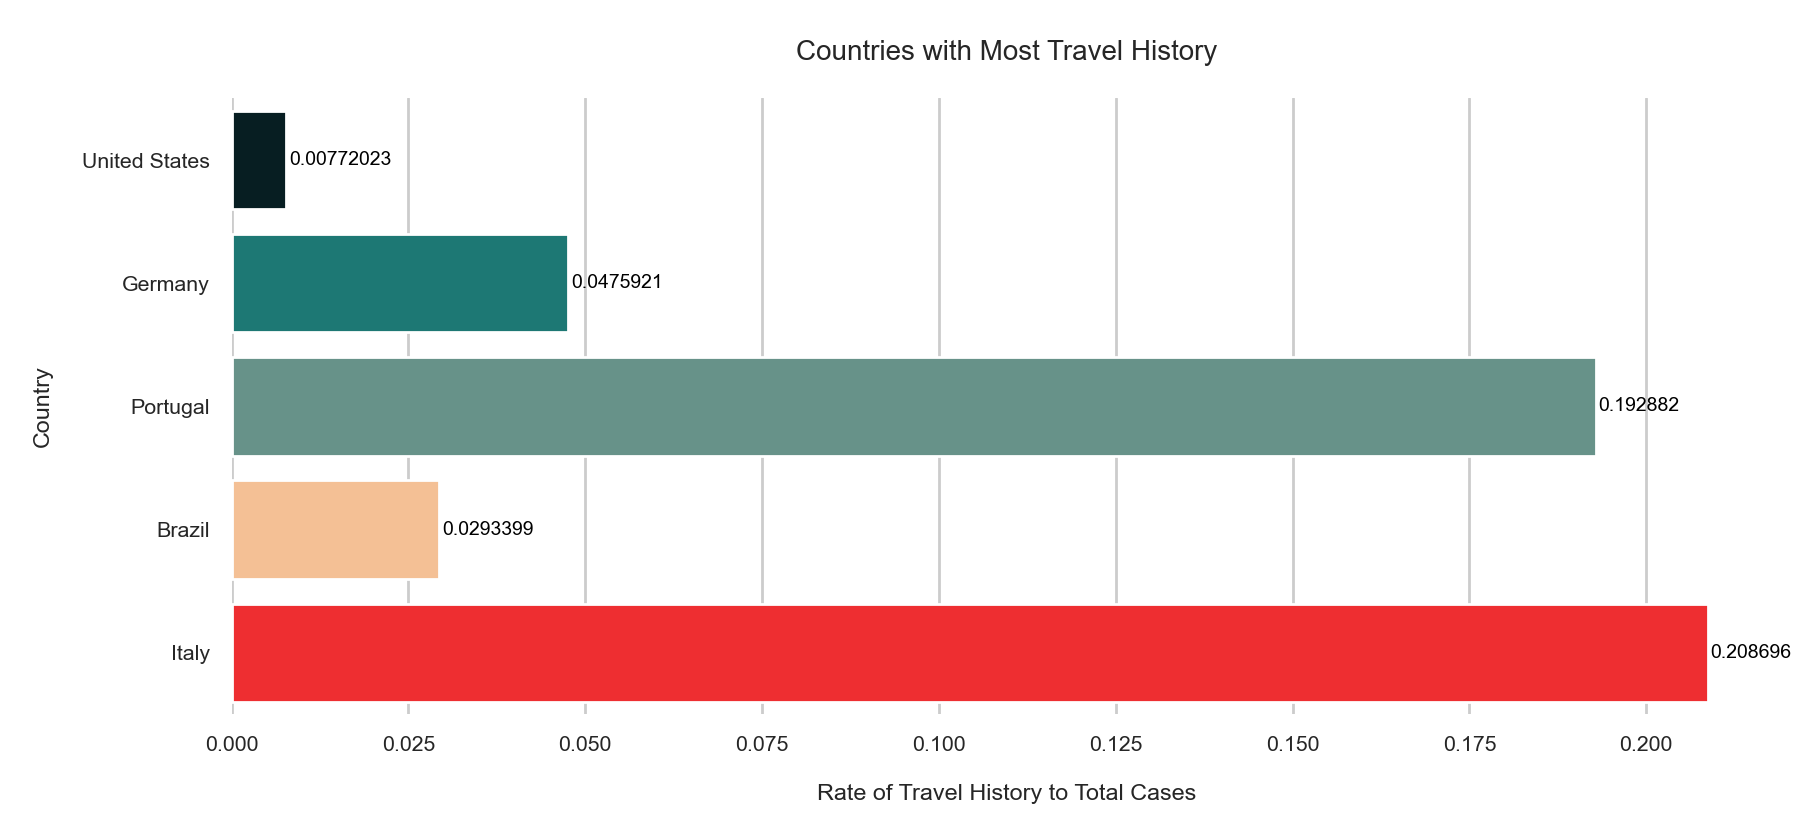

In [563]:
plt.subplots(figsize=(20, 8))
p = sns.barplot(y=case_total_travel_top5["Country"], x=case_total_travel_top5["Travel_History_to_Total_Cases"],
    palette=palette, saturation=1)

p.axes.set_title("\nCountries with Most Travel History\n", fontsize=20)
plt.ylabel("\nCountry\n")
plt.xlabel("\nRate of Travel History to Total Cases\n")
plt.xticks(rotation=0)

for container in p.containers:
    p.bar_label(container, label_type="edge", padding=2, size=14, color="black", rotation=0)

sns.despine(left="True", bottom="True")
plt.show()

In [605]:
overall_travel_history_to_cases = (case["Travel_History_Yes"].sum() + case["Travel_History_No"].sum()) / case["Confirmed_Cases"].sum()

In [606]:
overall_travel_history_to_cases

0.0061712344202333284